In [2]:
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
with open("/content/connections.txt", "r") as file:
    edges = [tuple(map(int, line.strip().split())) for line in file]


In [9]:
#Directed Graph
G = nx.DiGraph()
G.add_edges_from(edges)

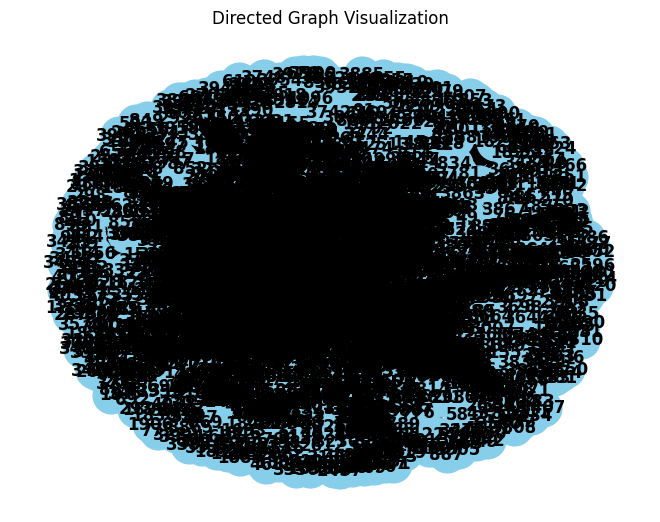

In [25]:
# Visualization of the Directed Graph
pos = nx.spring_layout(G)  # You can use different layout algorithms based on your preference
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', arrowsize=15)
plt.title("Directed Graph Visualization")
plt.show()

In [28]:
#bridges
i = G.to_undirected()
bridges = list(nx.bridges(i))
print("Bridges:", bridges)

Bridges: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]


In [11]:
#density of the graph
density = nx.density(G)
print("Graph Density:", density)
#density measures the proportion of edges to possible edges in the graph.

Graph Density: 0.0054099817517196435


In [12]:
#highest and lowest number of connections
degree_centrality = nx.degree_centrality(G)
max_degree_node = max(degree_centrality, key=degree_centrality.get)
min_degree_node = min(degree_centrality, key=degree_centrality.get)
print("Node with the highest degree centrality:", max_degree_node)
print("Node with the lowest degree centrality:", min_degree_node)

Node with the highest degree centrality: 107
Node with the lowest degree centrality: 11


In [15]:
# Task 5: Show nodes with the highest incoming and outgoing connections
in_degree_centrality = dict(G.in_degree())
out_degree_centrality = dict(G.out_degree())

max_in_degree_node = max(in_degree_centrality, key=in_degree_centrality.get)
max_out_degree_node = max(out_degree_centrality, key=out_degree_centrality.get)

print("Node with the highest incoming connections:", max_in_degree_node)
print("Node with the highest outgoing connections:", max_out_degree_node)


Node with the highest incoming connections: 1888
Node with the highest outgoing connections: 107


In [17]:
#highest closeness, betweenness, and eigenvector centrality
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
max_iter_eigenvector = 500
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=max_iter_eigenvector)

print("Node with the highest closeness centrality:", max(closeness_centrality, key=closeness_centrality.get))
print("Node with the highest betweenness centrality:", max(betweenness_centrality, key=betweenness_centrality.get))
print("Node with the highest eigenvector centrality:", max(eigenvector_centrality, key=eigenvector_centrality.get))

Node with the highest closeness centrality: 2642
Node with the highest betweenness centrality: 1684
Node with the highest eigenvector centrality: 2655


Node 2642 is strategically positioned, enabling the rapid and efficient flow of information across the network. This suggests its potential as a highly effective conduit for quickly spreading marketing messages.

Node 1684 acts as a crucial connector or bridge in the network, controlling the information flow. Targeting this node becomes essential for accessing various segments of the network.

Node 2655 wields influence through its connections with other key nodes. Its strategic importance lies in its ability to influence other central figures in the network, making it a valuable asset for exerting control.

In [19]:
#community detection algorithm
communities = list(nx.strongly_connected_components(G))
print("Number of communities:", len(communities))

Number of communities: 4039


In [30]:
#largest and smallest community
largest_community = max(communities, key=len)
smallest_community = min(communities, key=len)
print("Largest Community:", largest_community)
print("Smallest Community:", smallest_community)

Largest Community: {332}
Smallest Community: {332}


In [ ]:
pip install cdlib

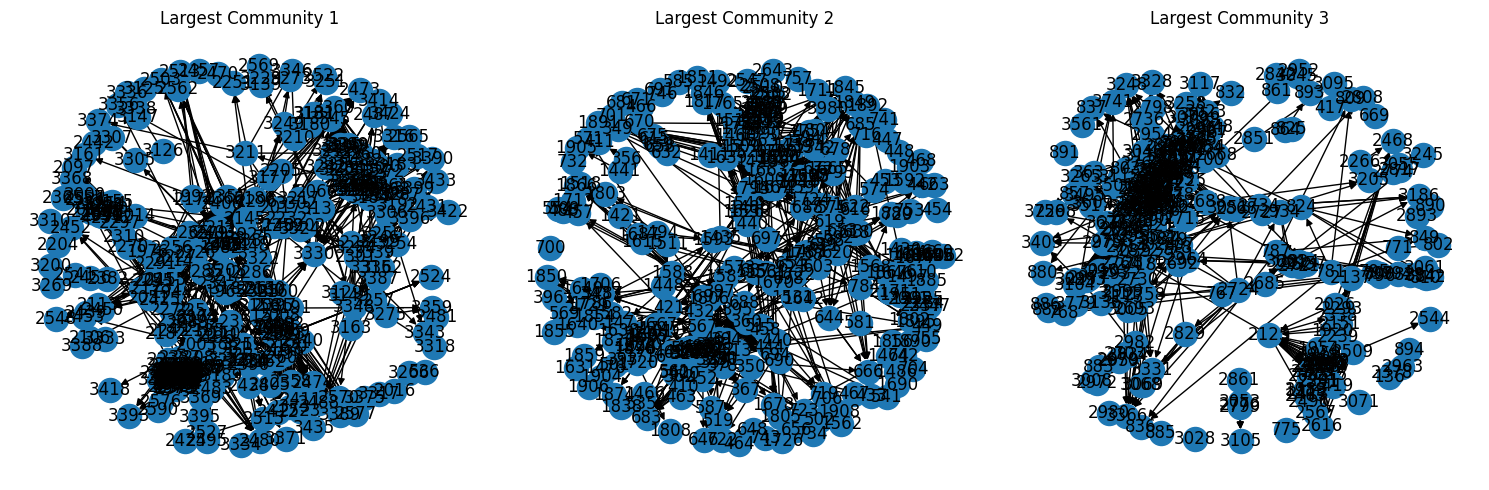

In [47]:
from cdlib import algorithms

#directed graph to an undirected graph
G_undirected = G.to_undirected()
#community detection
communities = algorithms.infomap(G_undirected)
#Sort
sorted_communities = sorted(communities.communities, key=len, reverse=True)[:3]
largest_communities = [G.subgraph(community) for community in sorted_communities]

plt.figure(figsize=(15, 5))
for i, subgraph in enumerate(largest_communities, 1):
    plt.subplot(1, 3, i)
    nx.draw(subgraph, with_labels=True)
    plt.title(f"Largest Community {i}")

plt.tight_layout()
plt.show()


In [ ]:
#centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

try:
    eigenvector_centrality = nx.eigenvector_centrality(G)
except nx.PowerIterationFailedConvergence:
    eigenvector_centrality = {}

#Combine all
centrality_measures = {
    "Degree Centrality": degree_centrality,
    "Closeness Centrality": closeness_centrality,
    "Betweenness Centrality": betweenness_centrality,
    "Eigenvector Centrality": eigenvector_centrality
}

for measure, centrality in centrality_measures.items():

    top_nodes = sorted(centrality, key=centrality.get, reverse=True)[:3]
    nodes_to_remove = [node for node in top_nodes if node in G]
    for node in nodes_to_remove:
        G.remove_node(node)

    plt.figure(figsize=(6, 6))
    nx.draw(G, with_labels=True)
    plt.title(f"Graph after removing top 3 nodes by {measure}")
    plt.show()


In [ ]:

undirected_graph = G.to_undirected()
community_structure = algorithms.infomap(undirected_graph)
leading_communities = sorted(community_structure.communities, key=len, reverse=True)[:3]


for community_index, community_nodes in enumerate(leading_communities, 1):
    current_community = G.subgraph(community_nodes)


    community_degree_centrality = nx.degree_centrality(current_community)
    community_closeness_centrality = nx.closeness_centrality(current_community)
    community_betweenness_centrality = nx.betweenness_centrality(current_community)

    try:
        community_eigenvector_centrality = nx.eigenvector_centrality(current_community)
    except nx.PowerIterationFailedConvergence:
        community_eigenvector_centrality = {}

    top_influencers = []


    influencers_subgraph = current_community.subgraph(top_influencers)

    plt.figure(figsize=(8, 6))
    community_layout = nx.spring_layout(current_community)
    nx.draw(current_community, community_layout, with_labels=True, node_color='lightblue', node_size=300)
    nx.draw(influencers_subgraph, community_layout, with_labels=True, node_color='red', node_size=500, font_color='white')
    plt.title(f"Top Influencers in Community {community_index}")
    plt.show()


# Business Context:
Company Name: ConnectTel - Telecom Solutions Provider

Business Scenario:
As a Marketing Agency operating on behalf of ConnectTel, our primary objective is to strategically promote new internet plans aimed at specific customer segments. The following hypothetical details outline our role, budget, cost per action, and the targeted audience selection process.

Marketing Budget and Cost Per Action:
- Marketing Budget: $100,000
- Cost Per Action: $5 (Advertisement cost per targeted customer)

Target Audience Selection:
- Identify Potential Segments: Conduct data analysis to pinpoint segments with a high likelihood of purchasing new internet plans. This includes:
  - Young professionals in urban areas.
  - Small businesses seeking cost-effective high-speed internet.
  - Families in suburban areas requiring reliable connectivity.

Data Analysis and Prediction:
- Utilize predictive analytics on historical data to forecast potential customer responses based on demographics, past interactions, and preferences.

Targeted Marketing Strategy:
- Segment-Focused Campaigns: Develop tailored campaigns for each segment, emphasizing unique selling propositions.
- Social Media Targeting: Utilize targeted advertising on platforms frequented by each segment.
- Content Creation: Generate engaging content (blogs, videos) addressing the specific needs and preferences of each segment.
- Email Marketing: Deploy personalized email campaigns with special offers for targeted segments.
- Geo-Targeted Ads: Employ location-based targeting for regions identified as high-potential markets.

Budget Allocation:
- Allocate the marketing budget proportionally based on segment potential and anticipated return on investment (ROI).
- Utilize analytics tools to monitor campaign performance and adjust spending for optimal results.

Testing and Optimization:
- Implement A/B testing to refine advertising content and channels for improved engagement.
- Continuously analyze campaign performance and customer feedback to make data-driven adjustments.

Measure Success Metrics:
- Track conversion rates, click-through rates, and customer acquisition costs for each segment.
- Analyze ROI for different marketing channels and adjust resources accordingly.

Customer Relationship Management (CRM):
- Implement CRM tools to track customer interactions and enhance overall customer engagement.

Decision on Targeting:
- Target: Focus efforts on young professionals in urban areas and small businesses requiring reliable, high-speed internet.
- Reasoning: These segments are anticipated to respond positively to new internet plans, showcasing potential for long-term value.